In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [4]:
data = pd.read_csv("Cluster by district.csv")
data

,District,Latitude,Longitude,surname
0,Kurigram,25.810347,89.648697,North Bengal
1,Jamalpur,24.923025,89.950111,North Bengal
2,Saidpur,25.778522,88.897377,North Bengal
3,Rangpur,25.744860,89.275589,North Bengal
4,Gazipur,23.999941,90.420273,Dhaka
5,Narayanganj,23.622641,90.499794,Dhaka
6,Dhaka,23.728783,90.393791,Dhaka
7,Chittagong,22.341900,91.815536,South Bengal
8,Feni,23.015913,91.397583,South Bengal
9,Chuadanga,23.643999,88.855637,West Bengal


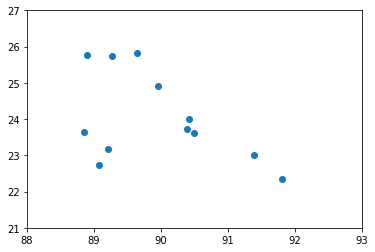

In [5]:
plt.scatter(data['Longitude'],data['Latitude'])
plt.xlim(88,93)
plt.ylim(21,27)
plt.show()

In [6]:

#data_mapped = data.copy()
#data_mapped['Language'] = data_mapped['Language'].map({'English':0,'French':1,'German':2})
#data_mapped

In [7]:
##iloc er kaj holo data separet kora

In [8]:

#x = data_mapped.iloc[:,3:4]
x = data.iloc[:,1:3]
x

,Latitude,Longitude
0,25.810347,89.648697
1,24.923025,89.950111
2,25.778522,88.897377
3,25.744860,89.275589
4,23.999941,90.420273
5,23.622641,90.499794
6,23.728783,90.393791
7,22.341900,91.815536
8,23.015913,91.397583
9,23.643999,88.855637


In [9]:
kmeans = KMeans(4) #how many cluster we want
kmeans.fit(x) #which data use for cluster

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
#cluster result which predic with help of KMeans
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([0, 0, 0, 0, 1, 1, 1, 3, 3, 2, 2, 2])

In [11]:
#data_with_clusters = data_mapped.copy()
data_with_clusters = data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

,District,Latitude,Longitude,surname,Cluster
0,Kurigram,25.810347,89.648697,North Bengal,0
1,Jamalpur,24.923025,89.950111,North Bengal,0
2,Saidpur,25.778522,88.897377,North Bengal,0
3,Rangpur,25.744860,89.275589,North Bengal,0
4,Gazipur,23.999941,90.420273,Dhaka,1
5,Narayanganj,23.622641,90.499794,Dhaka,1
6,Dhaka,23.728783,90.393791,Dhaka,1
7,Chittagong,22.341900,91.815536,South Bengal,3
8,Feni,23.015913,91.397583,South Bengal,3
9,Chuadanga,23.643999,88.855637,West Bengal,2


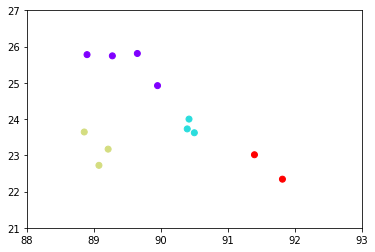

In [12]:
plt.scatter(data_with_clusters['Longitude'],data_with_clusters['Latitude'],c = data_with_clusters['Cluster'],cmap = 'rainbow')
plt.xlim(88,93)
plt.ylim(21,27)
plt.show()

In [13]:
#elbow method [ use for how much cluster we create]

In [14]:
kmeans.inertia_

2.060393231949648

In [15]:
wcss = []
for i in range(1,12):
    kmeans = KMeans(i)
    kmeans.fit(x)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

In [16]:
wcss

[27.150393120129788,
 11.684074234069717,
 5.164080187801707,
 2.060393231949648,
 1.169313889564989,
 0.7901266337941609,
 0.47563751660516074,
 0.2629965310063337,
 0.15355226238383238,
 0.08180319896733157,
 0.011251380086498449]

Text(0,0.5,'Within-cluster sum of squares')

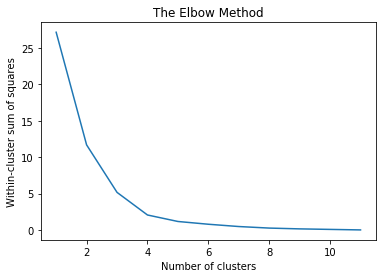

In [17]:
number_clusters = range(1,12)
plt.plot(number_clusters,wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')